# Sampling and Likelihood Evaluation for Univariate Gaussian Distributions

## The Gaussian Distribution
The univariate Gaussian distribution is defined by its probability density function (PDF):

```
p(x|μ,σ) = (1/√(2πσ²)) * exp(-(x-μ)²/(2σ²))
```

where μ is the mean and σ is the standard deviation.

## Task 1: Drawing Samples
Given parameters μ and σ, we can draw samples from this distribution using:
```python
samples = np.random.normal(loc=μ, scale=σ, size=n)
```

## Task 2: Evaluating Likelihoods
Given a set of samples {x₁, ..., xₙ}, we can evaluate:

1. The likelihood of each individual sample:
```python
def gaussian_pdf(x, μ, σ):
    return (1/(σ * np.sqrt(2*np.pi))) * np.exp(-(x-μ)**2/(2*σ**2))
```

2. The log-likelihood of the entire dataset:
```python
def log_likelihood(samples, μ, σ):
    return np.sum(np.log(gaussian_pdf(samples, μ, σ)))
```

## Visualization Methods
We explore three ways to visualize these concepts:
1. Points on a real line to show raw samples
2. Histogram to show empirical distribution
3. KDE to estimate the underlying density:
   ```python
   kde = gaussian_kde(samples)
   density_estimate = kde(x_points)
   ```

The KDE provides a non-parametric way to estimate p(x) from samples, which can be compared against the true Gaussian PDF for validation.

These tools help us understand both the generative process (drawing samples) and the inferential process (estimating likelihood of observations under the model).

In [56]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import gaussian_kde
%matplotlib inline

In [57]:
def univariate_gaussian_pdf(x, mean, std):
    return 1/(std * np.sqrt(2*np.pi)) * np.exp(-(x - mean)**2 / (2*std**2))

def log_likelihood(samples, mean, std):
    return np.sum(np.log(univariate_gaussian_pdf(samples, mean, std)))

In [58]:
# Draw samples from a univariate normal
num_samples = 1000
mean = 4.0
std = 2.0
samples = np.random.normal(loc=mean, scale=std, size=num_samples)

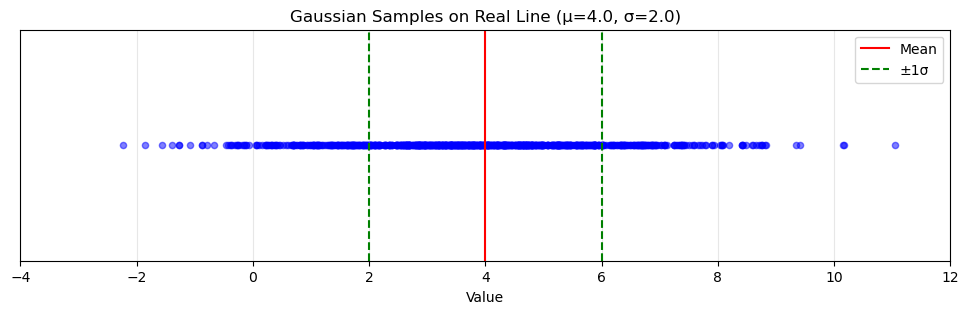

In [59]:
# Plot the samples
fig, ax = plt.subplots(figsize=(12, 3))

# Plot samples as points on the line
ax.scatter(samples, np.zeros_like(samples), alpha=0.5, color='blue', s=20)

# Add vertical lines for mean and standard deviations
ax.axvline(x=mean, color='red', linestyle='-', label='Mean')
ax.axvline(x=mean + std, color='green', linestyle='--', label='±1σ')
ax.axvline(x=mean - std, color='green', linestyle='--')

# Set y-axis limits and hide y-axis
ax.set_ylim(-0.5, 0.5)
ax.set_yticks([])

# Set x-axis limits to cover mean ± 4 standard deviations
ax.set_xlim(mean - 4*std, mean + 4*std)

# Add grid and legend
ax.grid(True, axis='x', alpha=0.3)
ax.legend()

# Add title and labels
plt.title(f'Gaussian Samples on Real Line (μ={mean}, σ={std})')
plt.xlabel('Value')

plt.show()

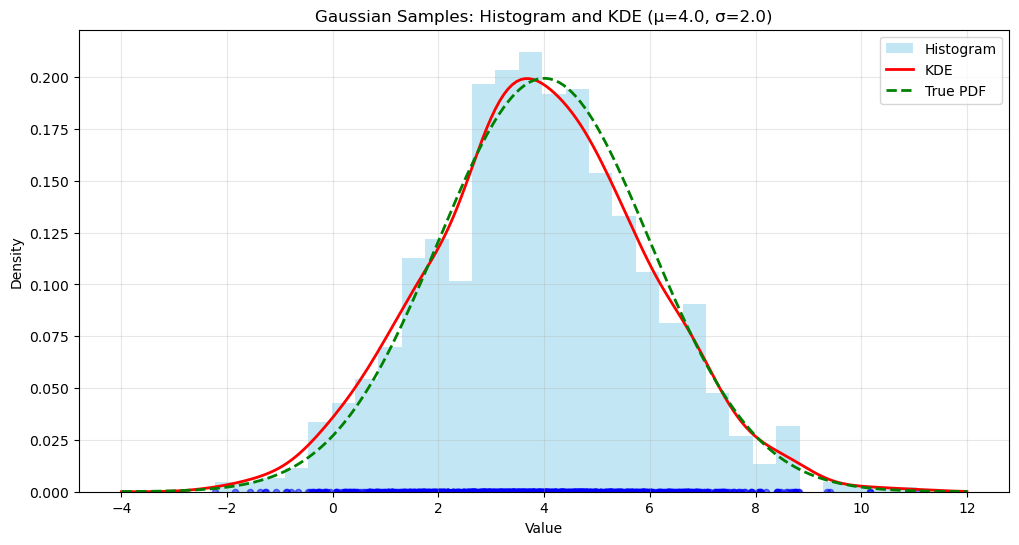

In [60]:
# Plot true pdf and the pdf approximated from sample via KDE
x_range = np.linspace(mean - 4*std, mean + 4*std, 200)
true_pdf = univariate_gaussian_pdf(x_range, mean, std)

kde = gaussian_kde(samples)
kde_values = kde(x_range)

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram
hist = ax.hist(samples, bins=30, density=True, alpha=0.5, 
                color='skyblue', label='Histogram')

# Plot KDE
ax.plot(x_range, kde_values, 'r-', lw=2, label='KDE')

# Plot true PDF
ax.plot(x_range, true_pdf, 'g--', lw=2, label='True PDF')

# Customize plot
ax.set_title(f'Gaussian Samples: Histogram and KDE (μ={mean}, σ={std})')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)

ax.scatter(samples, np.zeros_like(samples), alpha=0.5, color='blue', s=20)

plt.show()

In [61]:
# Evaluate likelihood of given samples
x = 4
p_x = univariate_gaussian_pdf(x, mean, std)
logp_x = log_likelihood(x, mean, std)
print('x = %f, p(x)=%f, logp(x)=%f' % (x, p_x, logp_x))

x = 4.000000, p(x)=0.199471, logp(x)=-1.612086


# Sampling and Likelihood Evaluation for 2D Gaussian Distributions

## The Multivariate Gaussian Distribution
The bivariate (2D) Gaussian distribution is defined by its PDF:

```
p(x|μ,Σ) = (1/√((2π)²|Σ|)) * exp(-1/2 (x-μ)ᵀΣ⁻¹(x-μ))
```

where:
- x is a 2D vector [x₁, x₂]
- μ is the mean vector [μ₁, μ₂]
- Σ is the 2×2 covariance matrix
- |Σ| is the determinant of Σ

## Task 1: Drawing Samples
Given parameters μ and Σ, we can draw samples using:
```python
samples = np.random.multivariate_normal(mean=μ, cov=Σ, size=n)
```

## Task 2: Evaluating Likelihoods
Given a set of 2D samples {x₁, ..., xₙ}, we can evaluate:

1. The likelihood of each individual sample:
```python
def gaussian_pdf_2d(x, μ, Σ):
    d = 2  # dimension
    norm_const = 1.0 / np.sqrt((2*np.pi)**d * np.linalg.det(Σ))
    x_μ = x - μ
    return norm_const * np.exp(-0.5 * x_μ.T @ np.linalg.inv(Σ) @ x_μ)
```

2. The log-likelihood of the entire dataset:
```python
def log_likelihood_2d(samples, μ, Σ, negative=False):
    ll = np.sum([np.log(gaussian_pdf_2d(x, μ, Σ)) for x in samples])
    return -ll if negative else ll
```

## Visualization Methods
For 2D Gaussians, we can visualize:
1. Scatter plot of raw samples
2. 2D histogram (heatmap)
3. 2D KDE estimation:
   ```python
   kde = gaussian_kde(samples.T)
   density_estimate = kde(grid_points)
   ```
4. Contour plots showing isoprobability curves

The geometry of the 2D case introduces interesting features:
- Correlation between variables is represented by off-diagonal elements in Σ
- Level sets of the density are ellipses
- Principal components of Σ determine the orientation of these ellipses

These tools extend naturally to higher dimensions, though visualization becomes more challenging beyond 3D.

In [62]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import gaussian_kde
from scipy.stats import multivariate_normal

%matplotlib inline


In [63]:
def gaussian_pdf_2d(x, mean, cov):
    d = 2  # dimension
    norm_const = 1.0 / np.sqrt((2*np.pi)**d * np.linalg.det(cov))
    xm = x - mean
    return norm_const * np.exp(-0.5 * xm.T @ np.linalg.inv(cov) @ xm)

def log_likelihood_2d(x, mean, cov):
    d = 2
    # Constant term
    log_norm = -0.5 * (d * np.log(2*np.pi) + np.log(np.linalg.det(cov)))
    
    # Compute quadratic form
    xm = x - mean
    quad_form = 0.5 * xm.T @ np.linalg.inv(cov) @ xm
    
    return log_norm - quad_form

In [64]:
# Draw samples
num_samples = 1000
mean = np.array([0.5, -3.0])
cov = np.array(
    [[1.0, 0.7],
     [0.7, 1.0]]
)
samples = np.random.multivariate_normal(mean=mean, cov=cov, size=num_samples)


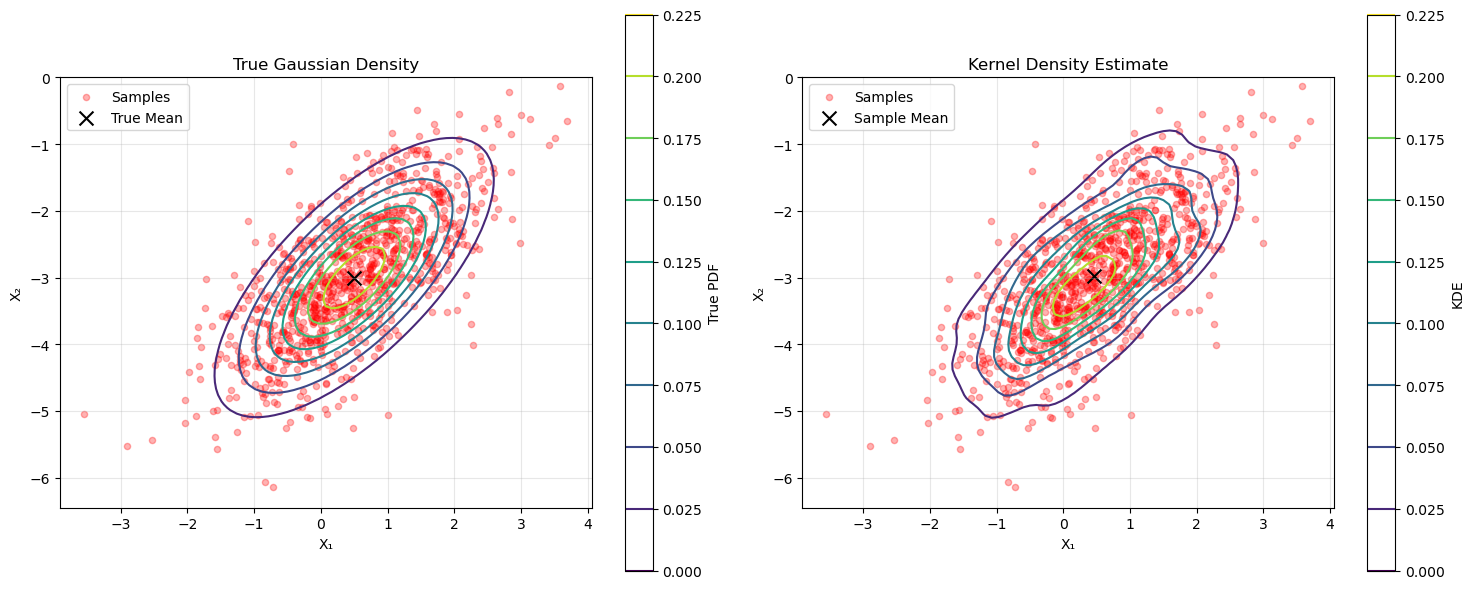

In [65]:
# Visualize

# Create grid of points
n_grid = 64
x = np.linspace(mean[0] - 3*np.sqrt(cov[0,0]), mean[0] + 3*np.sqrt(cov[0,0]), n_grid)
y = np.linspace(mean[1] - 3*np.sqrt(cov[1,1]), mean[1] + 3*np.sqrt(cov[1,1]), n_grid)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Calculate true PDF on grid
rv = multivariate_normal(mean, cov)
Z_true = rv.pdf(pos)

# Calculate KDE on grid
kde = gaussian_kde(samples.T)
Z_kde = kde.evaluate(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot true density
cont1 = ax1.contour(X, Y, Z_true, levels=10, cmap='viridis')
plt.colorbar(cont1, ax=ax1, label='True PDF')
ax1.scatter(samples[:,0], samples[:,1], c='red', alpha=0.3, s=20, label='Samples')
ax1.scatter(mean[0], mean[1], c='black', marker='x', s=100, label='True Mean')
ax1.set_title('True Gaussian Density')
ax1.set_xlabel('X₁')
ax1.set_ylabel('X₂')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot KDE
cont2 = ax2.contour(X, Y, Z_kde, levels=10, cmap='viridis')
plt.colorbar(cont2, ax=ax2, label='KDE')
ax2.scatter(samples[:,0], samples[:,1], c='red', alpha=0.3, s=20, label='Samples')
sample_mean = samples.mean(axis=0)
ax2.scatter(sample_mean[0], sample_mean[1], c='black', marker='x', s=100, 
            label='Sample Mean')
ax2.set_title('Kernel Density Estimate')
ax2.set_xlabel('X₁')
ax2.set_ylabel('X₂')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()


In [66]:
# Evaluate likelihood of given samples
x = np.array([1.0, -2.0])
p_x = gaussian_pdf_2d(x, mean, cov)
logp_x = log_likelihood_2d(x, mean, cov)
print(f'x = ({x[0]:.3f}, {x[1]:.3f}), p(x)={p_x:.6f}, logp(x)={logp_x:.6f}')

x = (1.000, -2.000), p(x)=0.129974, logp(x)=-2.040420


In [67]:
# Estimate the empirical mean & covariance from samples
mu = np.sum(samples, axis=0)/num_samples
print(f'True mean: ({mean[0]:.3f}, {mean[1]:.3f}), Empirical mean: ({mu[0]:.3f}, {mu[1]:.3f}) ')

xm = samples - mu
print('True covariance:\n', cov)
print('Empirical covariance:\n', xm.T @ xm / (num_samples-1))

True mean: (0.500, -3.000), Empirical mean: (0.456, -2.979) 
True covariance:
 [[1.  0.7]
 [0.7 1. ]]
Empirical covariance:
 [[0.99481473 0.66039626]
 [0.66039626 0.92092581]]
